In [ ]:
!pip install nltk
#installing the nltk library.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')
#importing nltk and downloading the stopwards.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import regex as re 
import gensim
import sklearn as sk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')

In [ ]:
print(train_data.shape)
print(test_data.shape)


(31962, 3)
(17197, 2)


In [ ]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
train_data.isnull().any()


id       False
label    False
tweet    False
dtype: bool

In [ ]:
test_data.isnull().any()


id       False
tweet    False
dtype: bool

In [ ]:
train_data[train_data['label'] == 0].head(15)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
train_data[train_data['label']==1].head(15)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<Axes: >

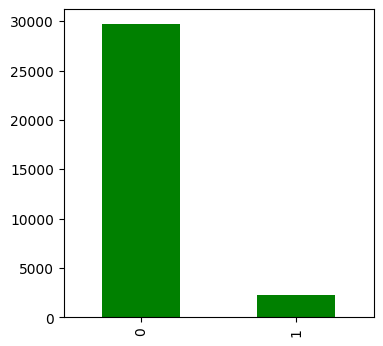

In [ ]:
train_data['label'].value_counts().plot.bar(color = 'green' , figsize=(4,4))

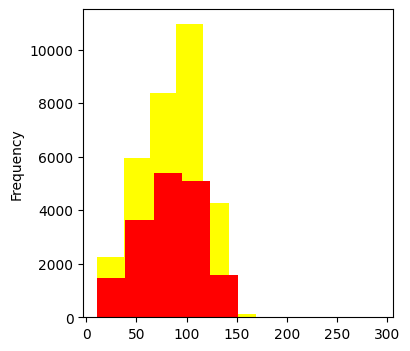

In [ ]:
length_train = train_data['tweet'].str.len().plot.hist(color = 'yellow', figsize = (4,4))
length_test  = test_data ['tweet'].str.len().plot.hist(color = 'red' , figsize = (4,4))


In [ ]:
train_data['length'] = train_data['tweet'].str.len()
test_data['length']  = test_data['tweet'].str.len()


In [ ]:
train_data.head()

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [ ]:
test_data.head()

,id,tweet,length
0,31963,#studiolife #aislife #requires #passion #dedic...,90
1,31964,@user #white #supremacists want everyone to s...,101
2,31965,safe ways to heal your #acne!! #altwaystohe...,71
3,31966,is the hp and the cursed child book up for res...,142
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",93


In [ ]:
train_data.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                 length                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

<ipython-input-19-6ccba635f488>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_data.groupby('length').mean()['label'].plot.hist(color = 'blue' , figsize = (4,4))


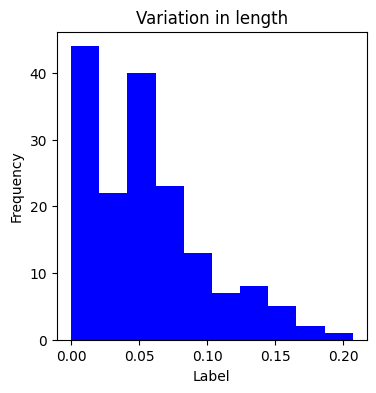

In [ ]:
train_data.groupby('length').mean()['label'].plot.hist(color = 'blue' , figsize = (4,4))
plt.title('Variation in length')
plt.xlabel('Label')
plt.show()

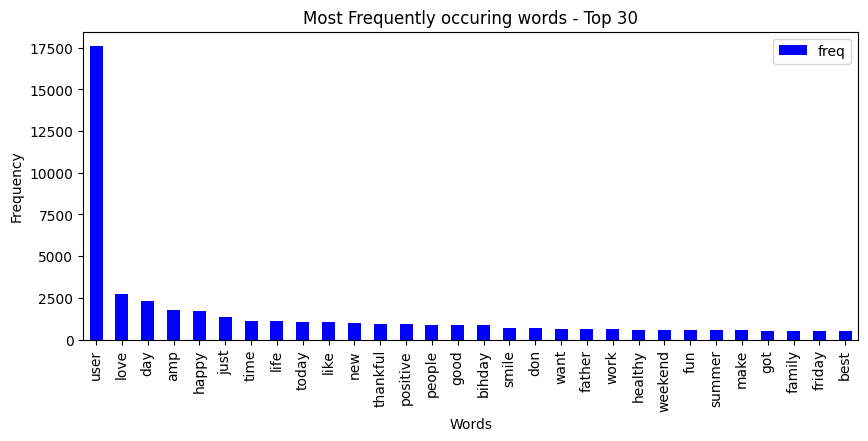

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_data.tweet)

sum_words = words.sum(axis = 0)

words_freq = [(word, sum_words[0,i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(10,4), color= "blue")
plt.title("Most Frequently occuring words - Top 30")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

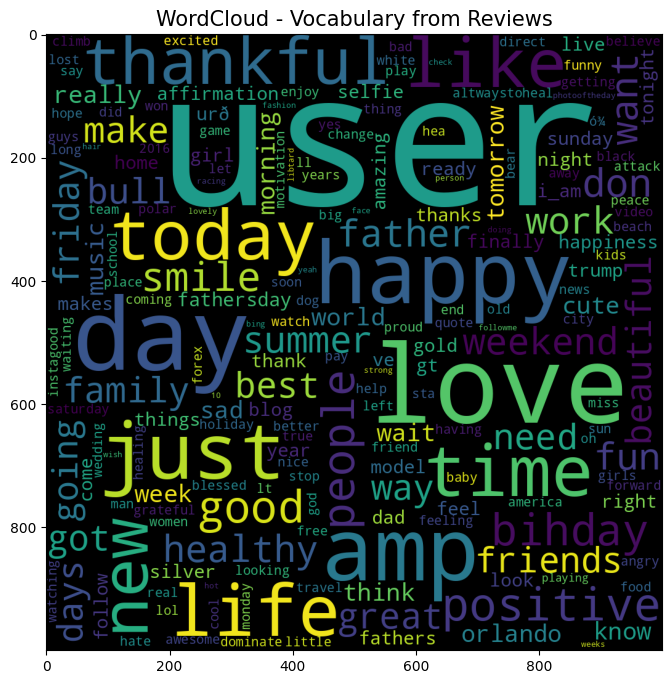

In [ ]:
from wordcloud import WordCloud

WordCloud = WordCloud(background_color = 'black', width = 1000, height= 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(WordCloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize= 15)


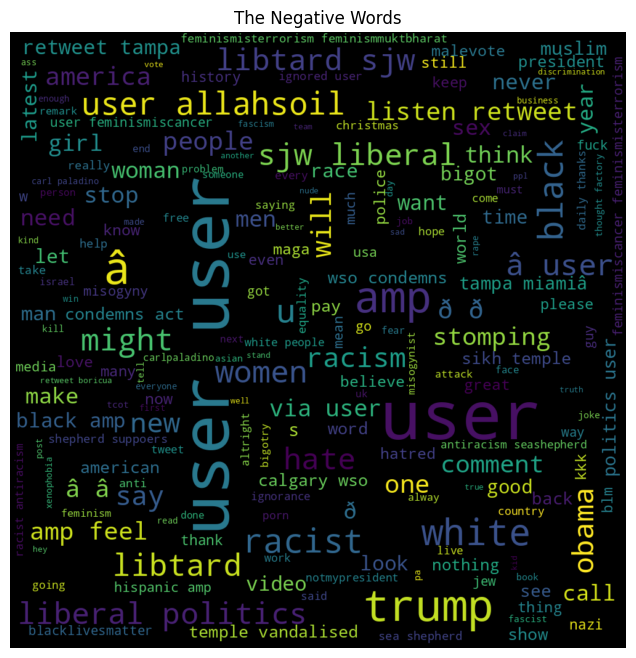

In [ ]:
from wordcloud import WordCloud
negative_words =' '.join([text for text in train_data['tweet'][train_data['label'] == 1]])

wordcloud = WordCloud(background_color = 'black', width=1000, height=1000, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [ ]:
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags


In [ ]:
HT_regular = hashtag_extract(train_data['tweet'][train_data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train_data['tweet'][train_data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

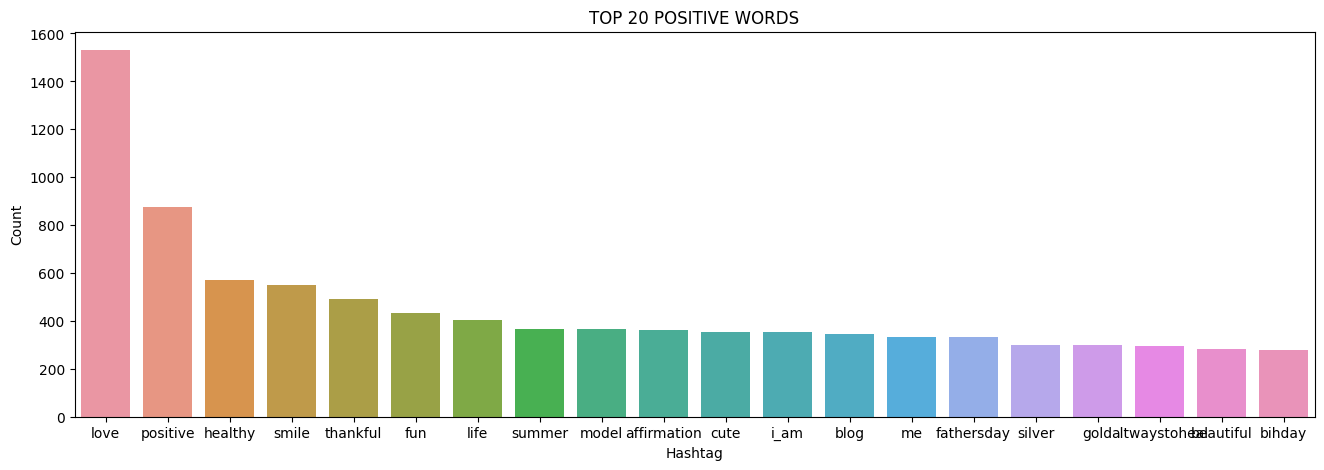

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("TOP 20 POSITIVE WORDS")
plt.show()

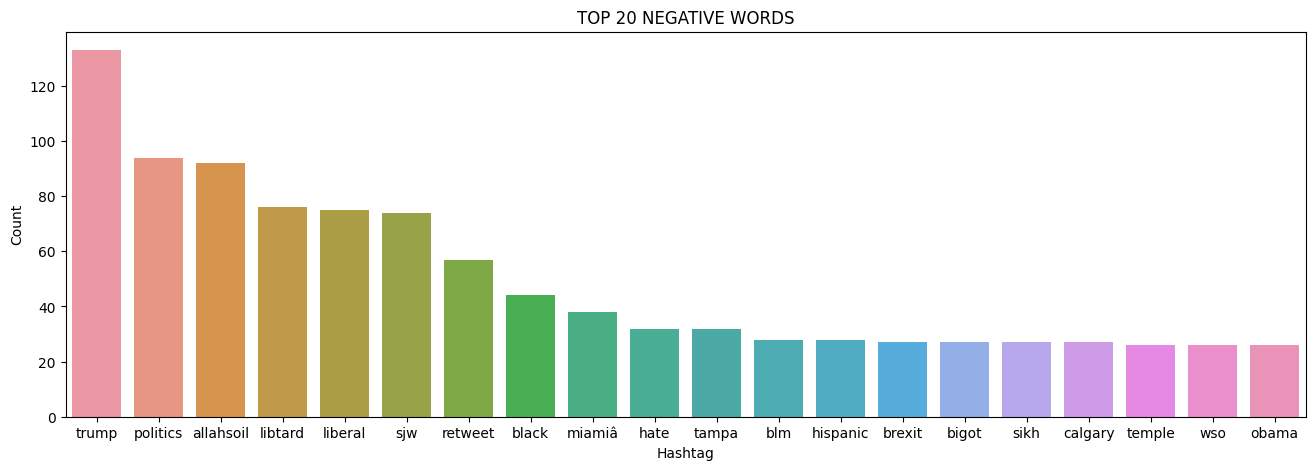

In [ ]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("TOP 20 NEGATIVE WORDS")
plt.show()


In [ ]:
tokenized_tweet = train_data['tweet'].apply(lambda x: x.split()) 

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            window=5,
            min_count=2,
            workers= 2,
            vector_size=200, # desired no. of features/independent variables 
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train_data['tweet']), epochs=20)


(6110125, 8411580)

In [ ]:
model_w2v.wv.most_similar(positive = "lunch")


[('sushi', 0.5805436968803406),
 ('spaghetti', 0.5772892236709595),
 ('provided', 0.574019730091095),
 ('mmm', 0.5729799866676331),
 ('#adidasler', 0.5681950449943542),
 ('cheat', 0.5662353038787842),
 ('breakfast', 0.5639523863792419),
 ('7!', 0.5581966638565063),
 ('joshua', 0.5573105812072754),
 ('mccormick', 0.5490062236785889)]

In [ ]:
model_w2v.wv.most_similar(positive = "cancer")


[('level.', 0.730370819568634),
 ('#merica', 0.7198595404624939),
 ('ownership', 0.7127991318702698),
 ('law.', 0.704461932182312),
 ('spewing', 0.7011500597000122),
 ('champion,', 0.7008418440818787),
 ('comparable', 0.6945061087608337),
 ("society's", 0.6934968829154968),
 ('disregard', 0.691623866558075),
 ('devoted', 0.6873511075973511)]

In [ ]:
model_w2v.wv.most_similar(negative= "hate")


[('#community', 0.02473691664636135),
 ('#tgif', 0.021252142265439034),
 ('de', 0.019015878438949585),
 ('â\x9c\x88ï¸\x8f', 0.016296029090881348),
 ('#ibiza', 0.006967516615986824),
 ('#ireland', 0.005236451514065266),
 ('#bihday', 0.0039489129558205605),
 ('#hungry', 0.0037602337542921305),
 ('street', 0.003530771704390645),
 ('#spain', -0.0014797929907217622)]

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [ ]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train_data['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)


In [ ]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test_data['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train_data.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9509448129145288
F1 score : 0.604040404040404
[[7300  132]
 [ 260  299]]


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.931673132273808
f1 score : 0.5357142857142857
[[7130  302]
 [ 244  315]]
